# Business Problem
Your company is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. You are charged with determining which aircraft are the lowest risk for the company to start this new business endeavor. You must then translate your findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.

## Import Library and load the dataset

In [318]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# file_path = '../Data/Aviation_Data.csv'
file_path = '../Data/Aviation_Data.csv'
df = pd.read_csv(file_path,low_memory=False,encoding= 'latin_1')
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


### Data Cleaning

In [319]:
# Filter the DataFrame to include only rows where 'Aircraft.Category' is 'Airplane' & Select relevant columns 
# df = df[df['Aircraft.Category'] == 'Airplane'][['Event.Date','Model','Make','Injury.Severity','Aircraft.damage','Aircraft.Category','Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries','Total.Uninjured','Weather.Condition','Broad.phase.of.flight']]
df = df[['Event.Date','Model','Make','Injury.Severity','Aircraft.damage','Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries','Total.Uninjured','Weather.Condition','Broad.phase.of.flight']]

# Cleaning the 'Make' and 'weather Condition' column by converting to title case
df.loc[:,'Make'] = df['Make'].str.title()
df.loc[:,'Weather.Condition'] = df['Weather.Condition'].str.upper()

#Percentage of missing values in dataset
df[['Event.Date','Model','Make','Injury.Severity','Aircraft.damage','Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries','Total.Uninjured','Weather.Condition','Broad.phase.of.flight']].isnull().mean() * 100


Event.Date                 1.614867
Model                      1.716695
Make                       1.684597
Injury.Severity            2.721698
Aircraft.damage            5.150086
Total.Fatal.Injuries      14.233851
Total.Serious.Injuries    15.461327
Total.Minor.Injuries      14.822686
Total.Uninjured            8.158454
Weather.Condition          6.586753
Broad.phase.of.flight     31.681941
dtype: float64

In [320]:
# Dropping rows with missing values in 'Make', 'Model', and 'Weather.Condition' columns
df = df.dropna(subset = ['Make','Event.Date','Model','Weather.Condition'])

# Filling missing values in the specified columns
df.loc[:, "Total.Fatal.Injuries"] = df["Total.Fatal.Injuries"].fillna(0)
df.loc[:, "Total.Serious.Injuries"] = df["Total.Serious.Injuries"].fillna(0)
df.loc[:, "Total.Minor.Injuries"] = df["Total.Minor.Injuries"].fillna(0)
df.loc[:, "Total.Uninjured"] = df["Total.Uninjured"].fillna(0)
df.loc[:, "Aircraft.damage"] = df["Aircraft.damage"].fillna('Unknown')
df.loc[:, "Broad.phase.of.flight"] = df["Broad.phase.of.flight"].fillna('Unknown')

In [321]:
df.loc[:,'Event.Year'] = pd.to_datetime(df['Event.Date']).dt.year.astype('Int64')
df['Event.Year']

0        1948
1        1962
2        1974
3        1977
4        1979
         ... 
90318    2022
90324    2022
90332    2022
90336    2022
90345    2022
Name: Event.Year, Length: 84338, dtype: Int64

In [322]:
#Save df in csv file for further analysis on powerbi
df.to_csv('AviationData.csv')

In [323]:
# Number of accidents per year
nbr_acc_yr = pd.DataFrame({'Year' : df['Event.Year'].value_counts().sort_index().index, 'Number_of_Accidents' : df['Event.Year'].value_counts().sort_index().values})

nbr_acc_yr = df.groupby('Event.Year')[['Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries','Total.Uninjured']].sum().reset_index().sort_values(by = 'Event.Year',ascending= True).astype('int')
nbr_acc_yr


,Event.Year,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
0,1948,2,0,0,0
1,1962,4,0,0,0
2,1974,3,0,0,0
3,1977,2,0,0,0
4,1979,1,2,1,44
5,1981,4,0,0,0
6,1982,1575,721,994,8304
7,1983,1273,673,1048,15106
8,1984,1228,697,1047,12495
9,1985,1648,612,1108,11292


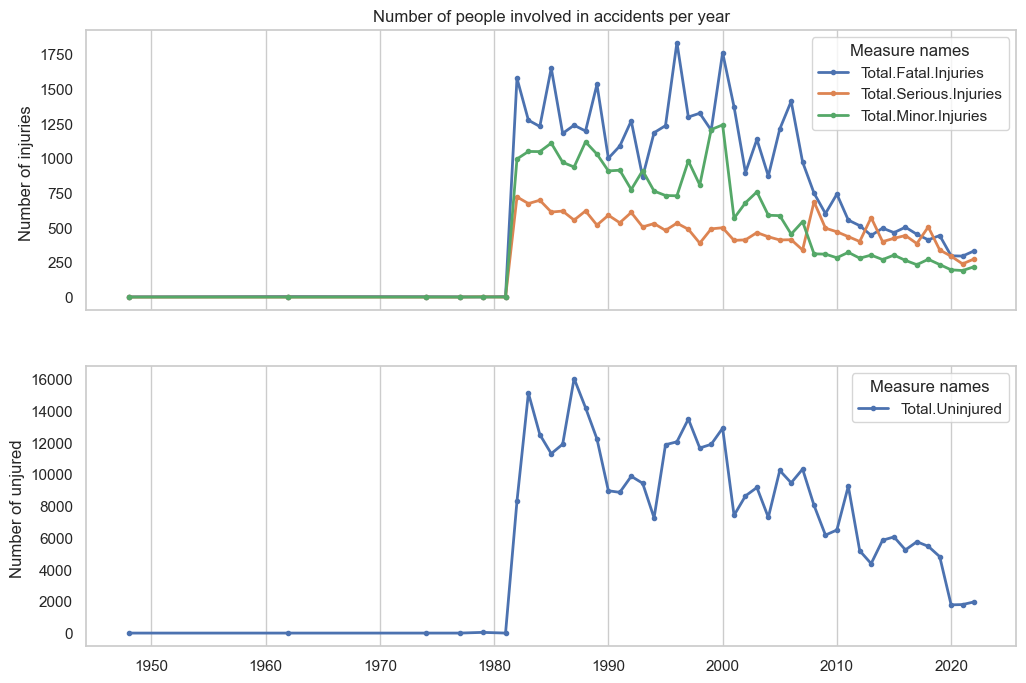

In [324]:
#
fig, (ax,ax2) = plt.subplots(2,1, sharex=True ,figsize = (12,8))
x = nbr_acc_yr['Event.Year']
y = nbr_acc_yr['Total.Fatal.Injuries']
ax.set_title("Number of people involved in accidents per year")
ax.plot(x,y,lw=2,marker = '.',label = 'Total.Fatal.Injuries')
ax.plot(x,nbr_acc_yr['Total.Serious.Injuries'],lw=2,marker = '.',label = 'Total.Serious.Injuries')
ax.plot(x,nbr_acc_yr['Total.Minor.Injuries'],lw=2,marker = '.',label = 'Total.Minor.Injuries')
ax.legend(title = ('Measure names'))
ax.set_ylabel("Number of injuries ")
ax.grid(axis= 'y')

ax2.plot(x,nbr_acc_yr['Total.Uninjured'],lw=2,marker = '.',label = 'Total.Uninjured')
ax2.legend(title = ('Measure names'))
ax2.set_ylabel("Number of unjured ")
ax2.grid(axis= 'y')
plt.show()

In [413]:
# dict_make_model = df[['Make','Model','Total.Uninjured']][df['Make']]
#top 10 aiplane with most fatal injuries
top_10_fatal_inj = df.groupby(['Make','Model','Broad.phase.of.flight','Aircraft.damage'])[['Total.Uninjured','Total.Fatal.Injuries','Total.Serious.Injuries']].sum().reset_index().sort_values(by = 'Total.Uninjured',ascending= False)
top_10_notfatal = df.groupby(['Make','Model'])['Total.Serious.Injuries'].mean().reset_index().sort_values(by = 'Total.Serious.Injuries',ascending= False).head(50)

list_10_fatal = [i[0] + " " + i[1] for i in top_10_fatal_inj.values]
count_fatal = [i[2] for i in top_10_fatal_inj.values]

# fig,ax = plt.subplots(figsize = (10,6))
# ax.bar(list_10_fatal,count_fatal)
# ax.set_xlabel('Model & Make')
# ax.set_ylabel('Number of fatal injuries')
# plt.show()
df[['Aircraft.damage','Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries','Total.Uninjured']][df['Aircraft.damage'].isnull() == True]
df[['Total.Uninjured','Total.Fatal.Injuries','Total.Serious.Injuries']].value_counts()


Total.Uninjured  Total.Fatal.Injuries  Total.Serious.Injuries
1.0              0.0                   0.0                       23414
2.0              0.0                   0.0                       15142
0.0              0.0                   0.0                        8568
                 1.0                   0.0                        6815
                 0.0                   1.0                        5826
                                                                 ...  
2.0              135.0                 15.0                          1
142.0            0.0                   7.0                           1
                                       2.0                           1
3.0              0.0                   5.0                           1
85.0             0.0                   2.0                           1
Name: count, Length: 981, dtype: int64

# Proportion of different aircraft damages from 1948 to 2022 in a pie chart

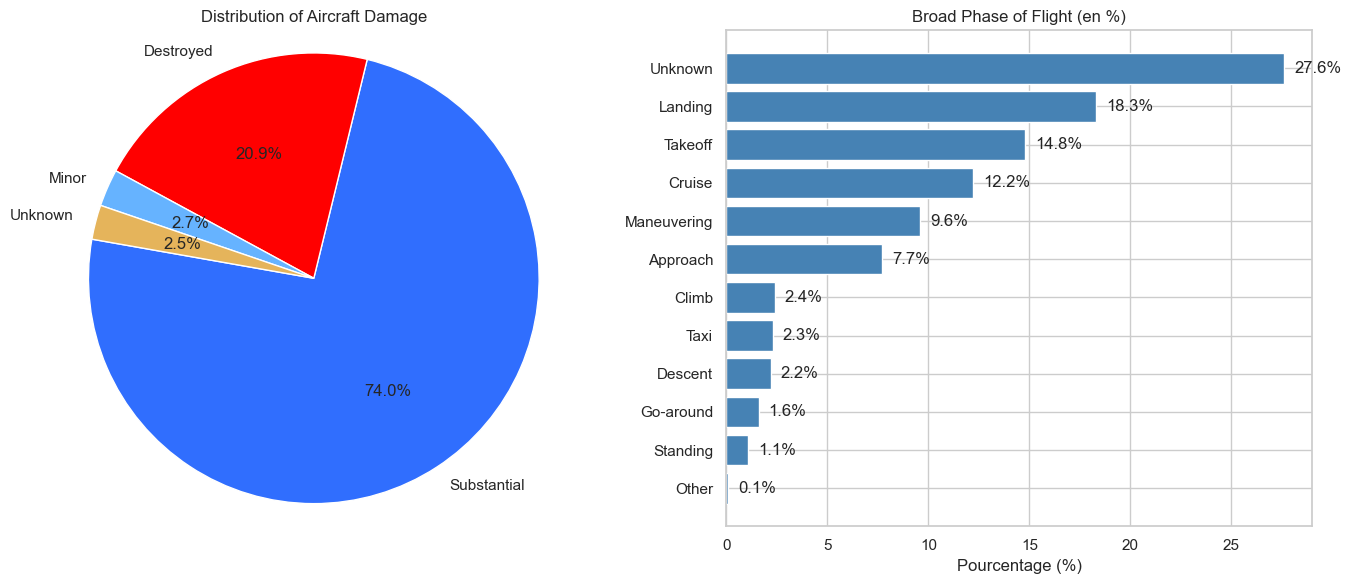

In [ ]:
# Aircraft Damage pie chart data
aircraft_damage = df['Aircraft.damage'].value_counts()
labels_damage = aircraft_damage.index

# Broad Phase of Flight bar chart data (en pourcentages)
broad_phase_flight_counts = df['Broad.phase.of.flight'].value_counts()
total_flights = broad_phase_flight_counts.sum()
broad_phase_flight_percent = (broad_phase_flight_counts / total_flights * 100).round(1)

# Color map for pie chart
color_map = {
    'Destroyed': '#ff0000',
    'Minor': '#66b3ff',
    'Substantial': "#306efe",
    'Unknown': "#E5B45B"
}
colors_damage = [color_map.get(label, "#%06x" % np.random.randint(0, 0xFFFFFF)) for label in labels_damage]

# Create figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Pie chart: Aircraft Damage
axes[0].pie(aircraft_damage, labels=labels_damage, autopct='%1.1f%%',
            startangle=170, colors=colors_damage)
axes[0].set_title('Distribution of Aircraft Damage')
axes[0].axis('equal')

# Bar chart: Broad Phase of Flight (in %)
axes[1].barh(broad_phase_flight_percent.index, broad_phase_flight_percent.values, color='#4682B4')
axes[1].set_title('Broad Phase of Flight (en %)')
axes[1].invert_yaxis()  # Pour voir la phase la plus fréquente en haut
axes[1].set_xlabel('Pourcentage (%)')

# Annoter les barres avec les pourcentages
for i, (value, label) in enumerate(zip(broad_phase_flight_percent.values, broad_phase_flight_percent.index)):
    axes[1].text(value + 0.5, i, f'{value:.1f}%', va='center')

plt.tight_layout()
plt.show()
